# Machine Intelligence II (week 4) - Team MensaNord

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

## Exercise 1
### A

In [116]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io.wavfile

In [118]:
sig = np.loadtxt("sound1.dat")
sound1 = np.asarray((2**16)*sig/(max(sig)-min(sig)), np.int16)
scipy.io.wavfile.write("sound1_orig.wav", 8192, sound1)

sig = np.loadtxt("sound2.dat")
sound2 = np.asarray((2**16)*sig/(max(sig)-min(sig)), np.int16)
scipy.io.wavfile.write("sound2_orig.wav", 8192, sound2)

sounds = np.array([sound1, sound2])
sounds[:, 0:5]

array([[  0,   0,   0,  -6,   2],
       [  0,  -1, -30, -19,   5]], dtype=int16)

### B

In [119]:
# DELETE LATER
A = [[0, 1], [2, 0]]
test = np.dot(A, sounds[:, 0:5])
print(test)
test = np.dot(np.linalg.inv(A), test[:, 0:5])
print(test)

[[  0  -1 -30 -19   5]
 [  0   0   0 -12   4]]
[[  0.   0.   0.  -6.   2.]
 [  0.  -1. -30. -19.   5.]]


In [120]:
A = np.random.random((2, 2))
print(A)
A_inv = np.linalg.inv(A)
xsounds = np.dot(A, sounds)
print(xsounds[:, 0:3])

# xsounds = mixed sounds
scipy.io.wavfile.write("sound1_mixed.wav", 8192, xsounds[0])
scipy.io.wavfile.write("sound2_mixed.wav", 8192, xsounds[1])

[[ 0.72495745  0.88851026]
 [ 0.99976505  0.64594358]]
[[  0.          -0.88851026 -26.65530779]
 [  0.          -0.64594358 -19.37830742]]


### C

In [121]:
neworder = np.random.permutation(np.arange(18000)) 
pxsounds = xsounds[:, np.asarray(neworder)]
print(pxsounds[:, 0:3])

# pxsounds = permutated mixed sounds
scipy.io.wavfile.write("sound1_mixed_perm.wav", 8192, pxsounds[0])
scipy.io.wavfile.write("sound2_mixed_perm.wav", 8192, pxsounds[1])

[[  7324.14449231   2450.66571863  13530.96465973]
 [  5288.22547143   1745.22493197  13263.26153429]]


### D

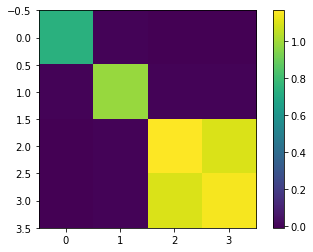

In [122]:
# doublecheck: formula
correlation = np.cov(sounds, pxsounds) / np.std(sounds, ddof=len(sounds)-1) / np.std(pxsounds, ddof=len(pxsounds)-1)
plt.imshow(correlation, interpolation='none')
plt.colorbar()

### E

In [123]:
# doublecheck: 1st centered each sound; 2nd centered overall -> which one?

# cpxsounds = centered permutated mixed sounds
cpxsounds = (pxsounds.T - np.mean(pxsounds, 1)).T           

# cxsounds = centered mixed sounds
cxsounds = xsounds - np.mean(xsounds)
cxsounds[:, 0:3]

array([[-71.34658148, -72.23509174, -98.00188927],
       [-71.34658148, -71.99252506, -90.7248889 ]])

## Exercise 2
### A

In [124]:
#doublecheck: take datapoint x = cpx or cx?

# slideset 22_ page 20
def fdashfrac(inp):
    return 1-2*(1/(1+np.exp(inp)))

W = np.random.random((2, 2))
print("Goal:")
print(A_inv)
print("W start")
print(W)

# algorithm skript page 32 (online learning ICA)
t = 1
eps0 = 0.0002
for n in range(1000):
    eps = eps0 / t
    x = cxsounds.T[n]
    W_inv = np.linalg.inv(W)
    dW = np.zeros_like(W)
    for (i, j), value in np.ndenumerate(W):
        argument = W[i, 0] * x[0] + W[i, 1]*x[1]
        dW[i, j] = W_inv[j, i] + fdashfrac(argument) * x[j]     # formula script 2.87
    W += eps * dW
    t += 1

print("W end")
print(W)

Goal:
[[-1.53788806  2.11540042]
 [ 2.38028023 -1.72600741]]
W start
[[ 0.12600129  0.7112852 ]
 [ 0.92161862  0.25999312]]
W end
[[ 2.98463103  4.43564085]
 [ 3.80079001  3.96684223]]


/home/georg/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp


### B

In [125]:
W = np.random.random((2, 2))
print("Goal:")
print(A_inv)
print("W start")
print(W)

# skript formula 2.100
t = 1
eps0 = 0.000002
for n in range(18000):
    eps = eps0 / t
    x = cxsounds.T[n]
    dW = np.zeros_like(W)
    for (i, j), value in np.ndenumerate(W):
        for l in range(2):
            delta_i_l = 0                       # TODO: false
            argument_i_k = W[i, 0] * x[0] + W[i, 1]*x[1]
            argument_l_k = W[l, 0] * x[0] + W[l, 1]*x[1]
            dW[i, j] = W[l, j] * (delta_i_l + fdashfrac(argument_i_k) * argument_l_k)
    W += eps * dW
    t += 1

print("W end")
print(W)

Goal:
[[-1.53788806  2.11540042]
 [ 2.38028023 -1.72600741]]
W start
[[ 0.48314496  0.81314785]
 [ 0.6816654   0.90634281]]


/home/georg/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: overflow encountered in exp


W end
[[ 0.5672193   0.92493315]
 [ 0.76574497  1.01813507]]
